In [ ]:
from scipy.stats import binom
p = 0.7
L = 10
rv = binom(L, p)

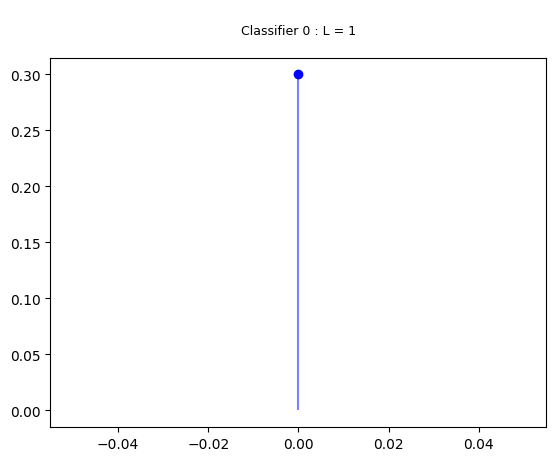

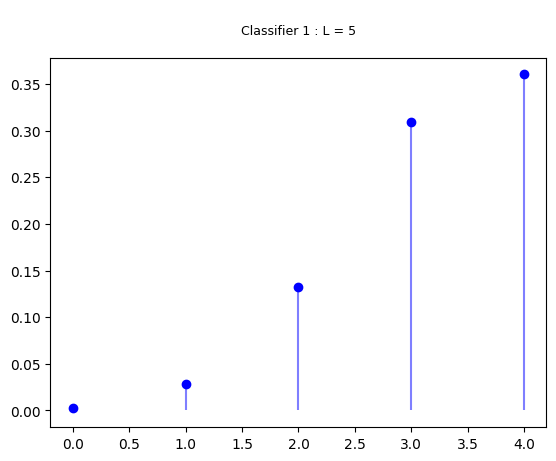

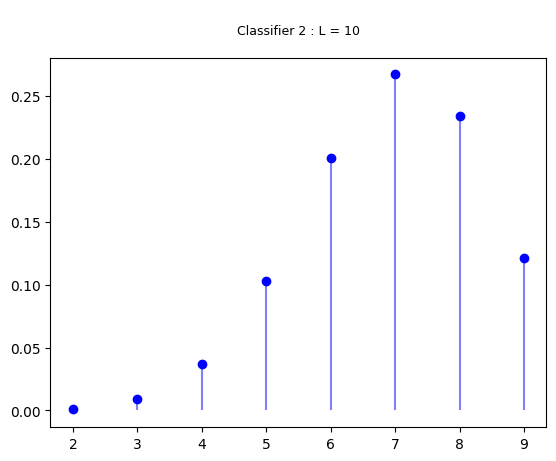

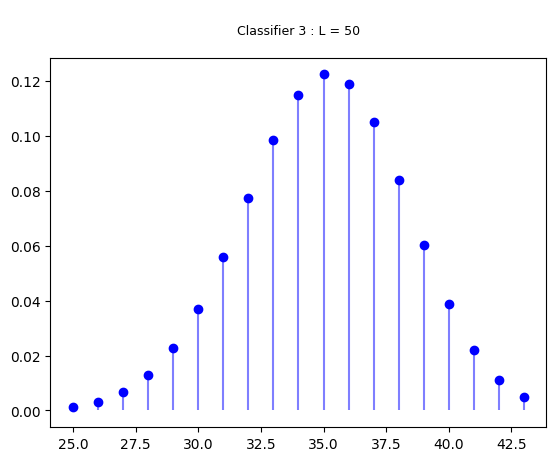

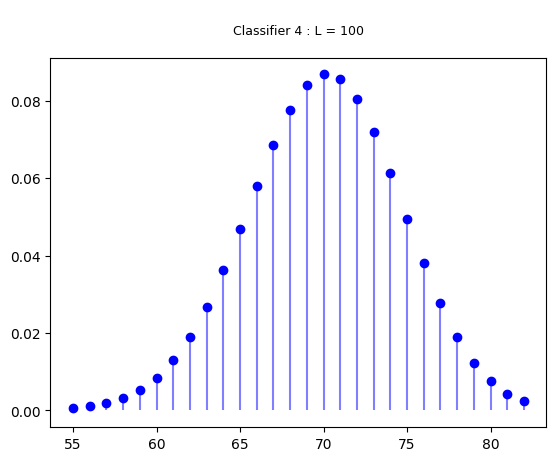

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


list_L = [1, 5, 10, 50, 100]

for i,L in enumerate(list_L):
  fig, ax = plt.subplots(1, 1)
  x = np.arange(binom.ppf(0.001, L, p),
                binom.ppf(0.999, L, p))
  ax.plot(x, binom.pmf(x, L, p), 'bo', label='binom pmf')
  ax.vlines(x, 0, binom.pmf(x, L, p), colors='b', alpha=0.5)
  plt.title(f"\nClassifier {i} : L = {L}\n",fontsize = 9)

For L = 1, the sum of probabilities for all classifier > L/2 is: 0.30000000000000004
For L = 5, the sum of probabilities for all classifier > L/2 is: 0.6688499999999998
For L = 10, the sum of probabilities for all classifier > L/2 is: 0.9244034877000001
For L = 50, the sum of probabilities for all classifier > L/2 is: 0.9990668027020932
For L = 100, the sum of probabilities for all classifier > L/2 is: 0.9999481405278752


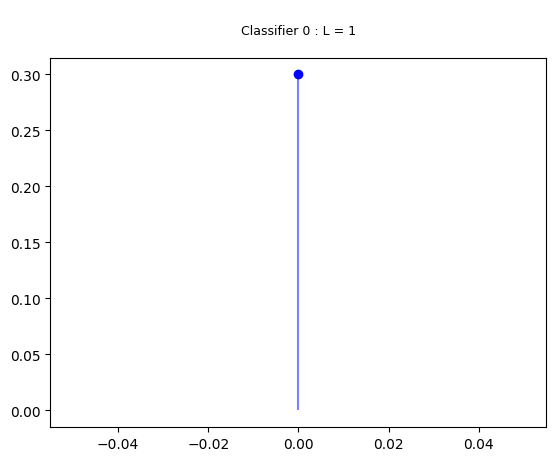

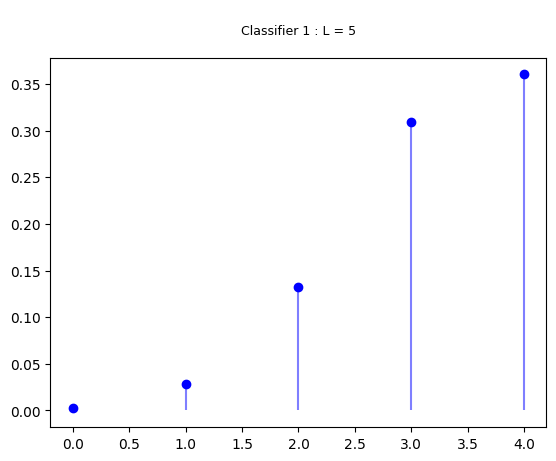

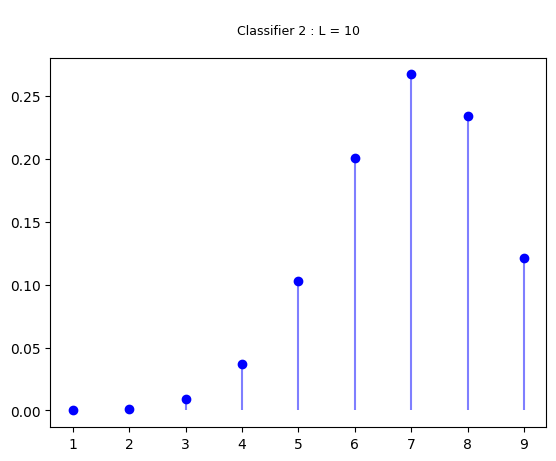

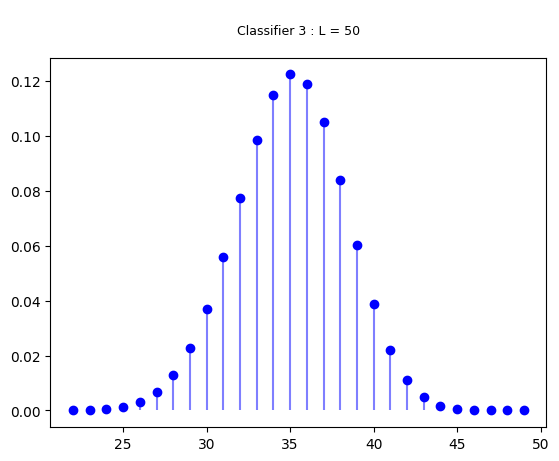

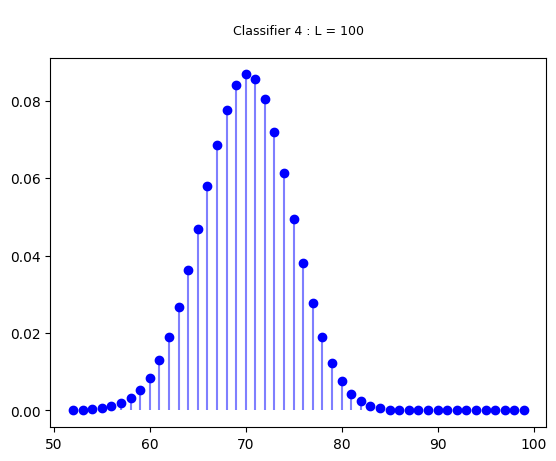

In [ ]:
from scipy.stats import binom
import matplotlib.pyplot as plt
import numpy as np

p = 0.7
L = 10
rv = binom(L, p)

list_L = [1, 5, 10, 50, 100]

for i, L in enumerate(list_L):
    fig, ax = plt.subplots(1, 1)
    x = np.arange(binom.ppf(0.0001,L,p),
                  binom.ppf(1, L, p))
    ax.plot(x, binom.pmf(x, L, p), 'bo', label='binom pmf')
    ax.vlines(x, 0, binom.pmf(x, L, p), colors='b', alpha=0.5)
    plt.title(f"\nClassifier {i} : L = {L}\n", fontsize=9)

    # Calculate the sum of the mass function for x > L/2
    sum_probability = np.sum(binom.pmf(x[x >= L/2], L, p)) if L > 1 else np.sum(binom.pmf(x, L, p))
    print(f"For L = {L}, the sum of probabilities for all classifier > L/2 is: {sum_probability}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 *rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 1 *(0.5 -rng.rand(16))
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

biais revient à overfitting içi

augmenter le bruit revient à augmenter le coefficient multiplicatif y[::5] += 1 *(0.5 -rng.rand(16))

sous échantillonner = reprendre moins de valeurs du dataset de base

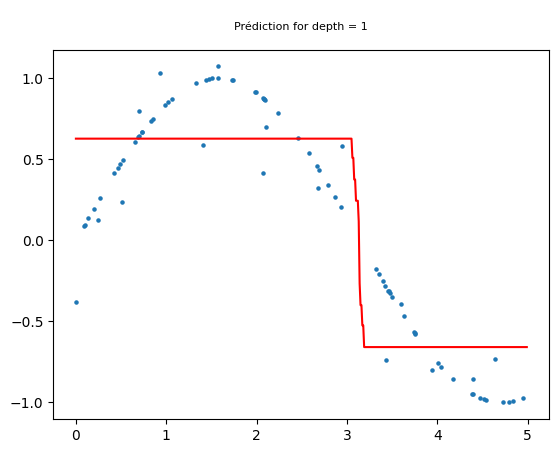

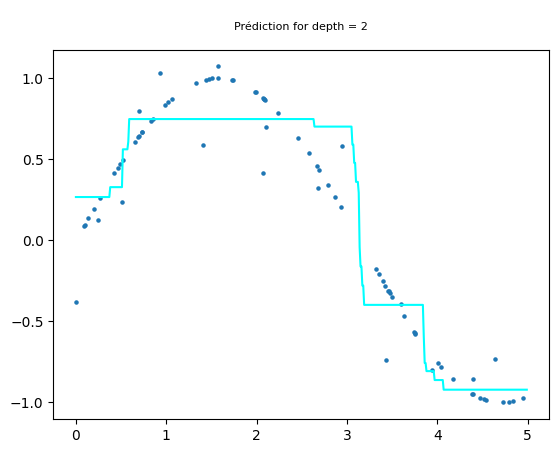

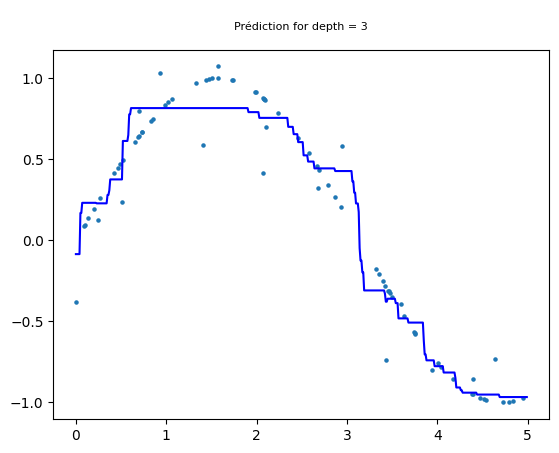

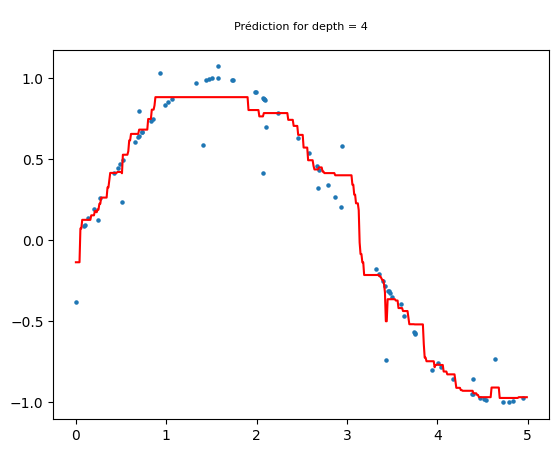

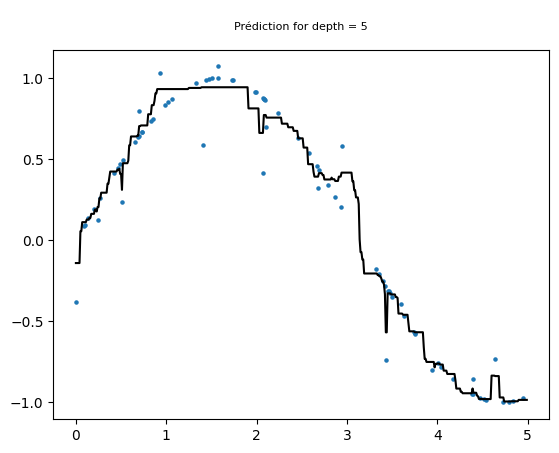

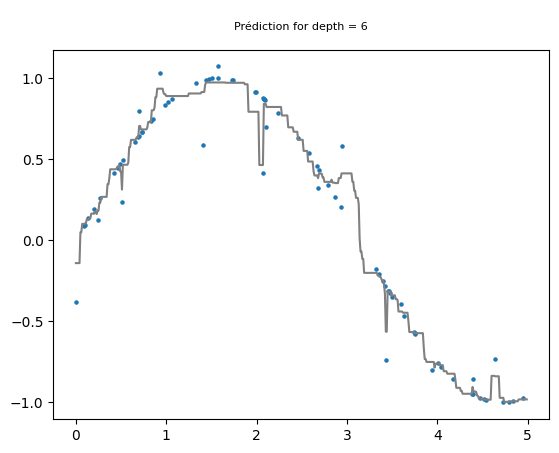

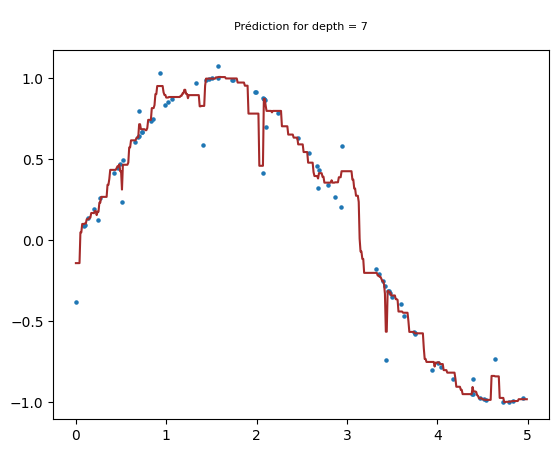

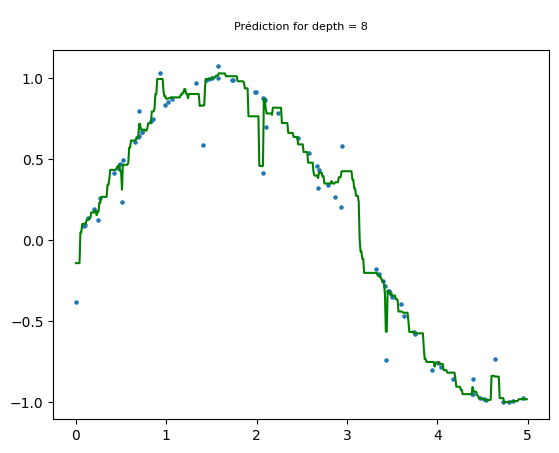

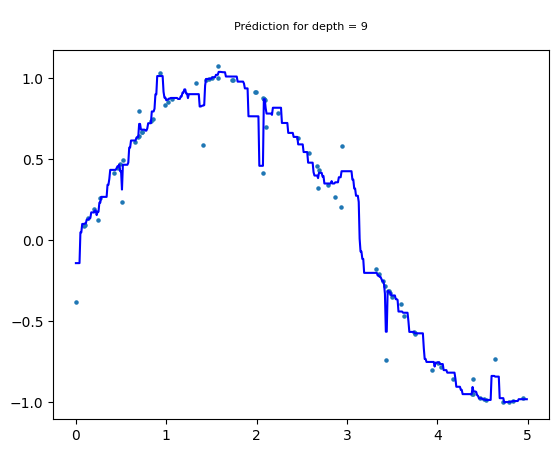

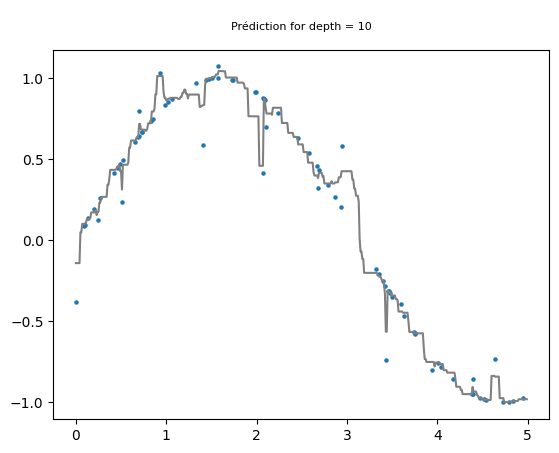

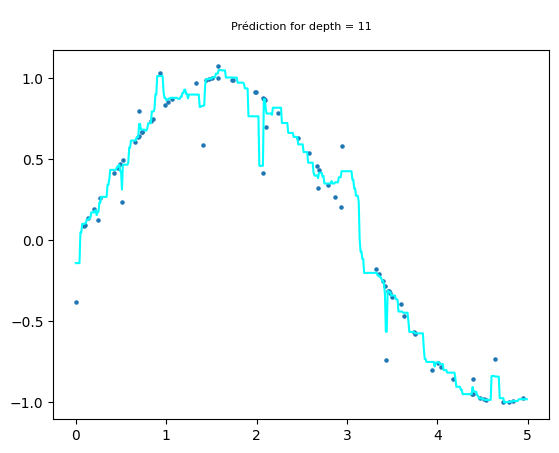

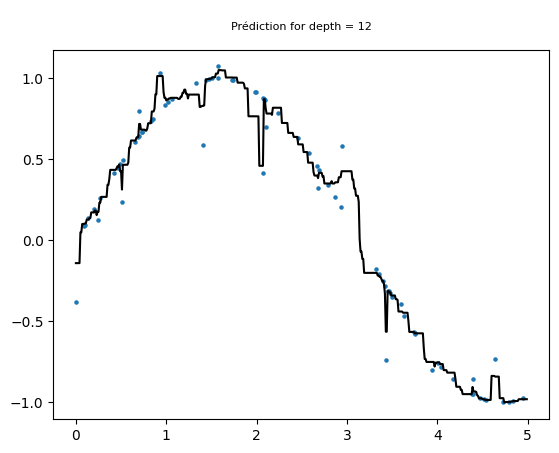

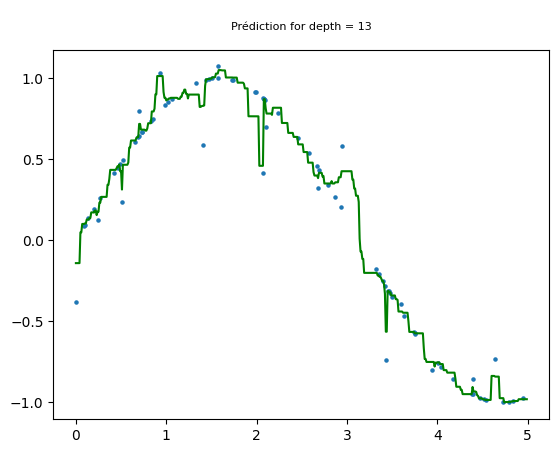

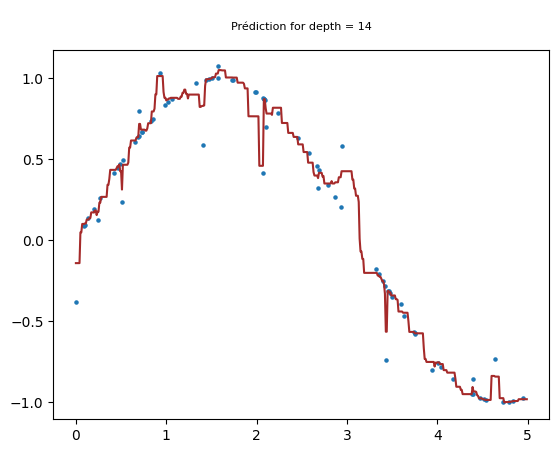

In [ ]:
depths = np.arange(1,15)

colors = ['blue','red','green','black','gray','cyan','brown']

for i,depth in enumerate(depths):
  regressor = DecisionTreeRegressor(max_depth= depth)
  bagging = BaggingRegressor(regressor,random_state=1,bootstrap=True)
  # fit the regressor with X and Y data
  bagging.fit(X, y)
  plt.figure(i)
  plt.scatter(X,y,s=5)
  plt.plot(X_test,bagging.predict(X_test),color=np.random.choice(colors))
  plt.title(f'\nPrédiction for depth = {depth}\n',fontsize=8)



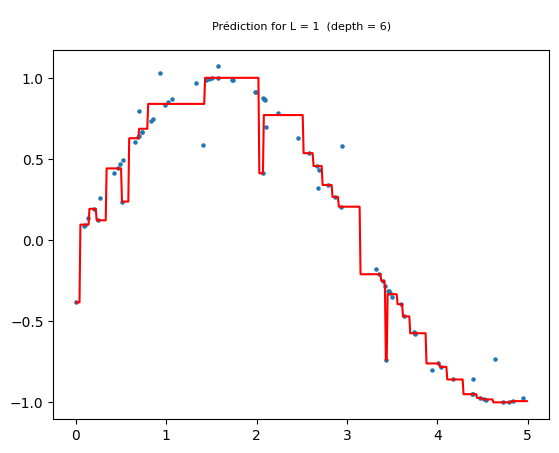

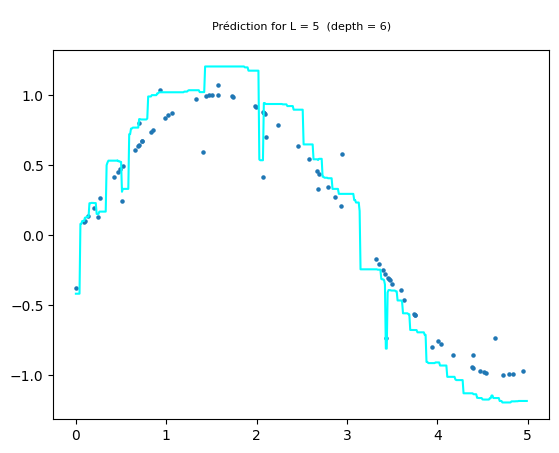

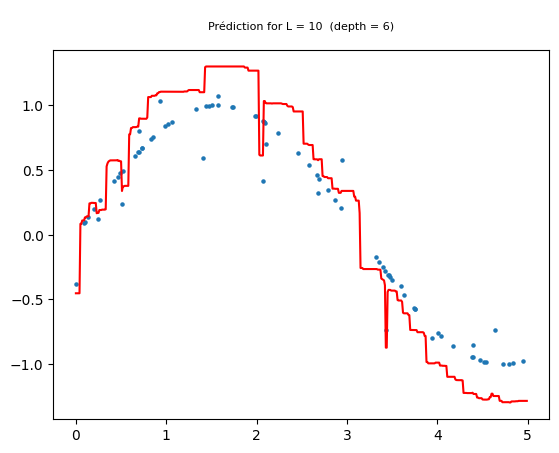

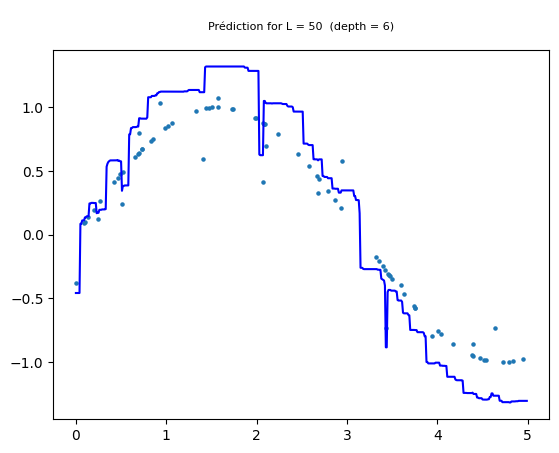

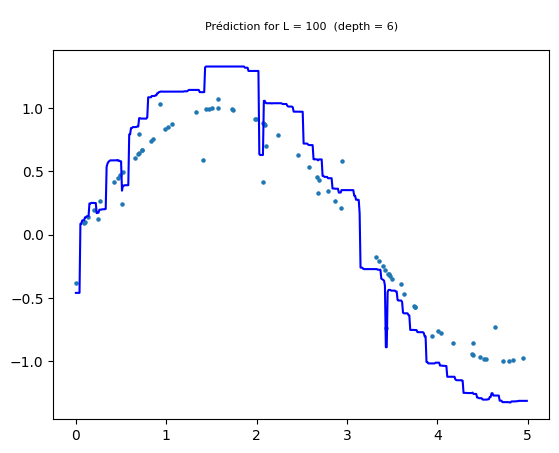

In [ ]:
depth = 6
predictions = []
for i,L in enumerate(list_L):
  w = 1/L
  regressor = DecisionTreeRegressor(max_depth= depth)
  bagging = BaggingRegressor(regressor,n_estimators=L,bootstrap=True)

  bagging.fit(X, y)

  # Prédiction sur l'ensemble de test
  y_pred = bagging.predict(X_test)
  predictions.append(w*y_pred)

  aggregated = np.sum(predictions,axis=0)
  plt.figure(i)
  plt.scatter(X,y,s=5)
  plt.plot(X_test,aggregated,color=np.random.choice(colors))
  plt.title(f'\nPrédiction for L = {L}  (depth = {depth})\n',fontsize=8)



En résumé, un bon modèle de Bagging doit avoir une faible variance et un bon compromis entre biais et variance, avec une performance robuste sur de nouvelles données.

Voici un exemple de surapprentissage ci dessous en jouant sur le bruit

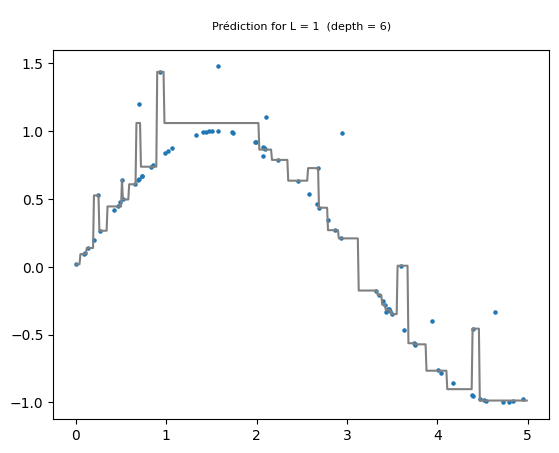


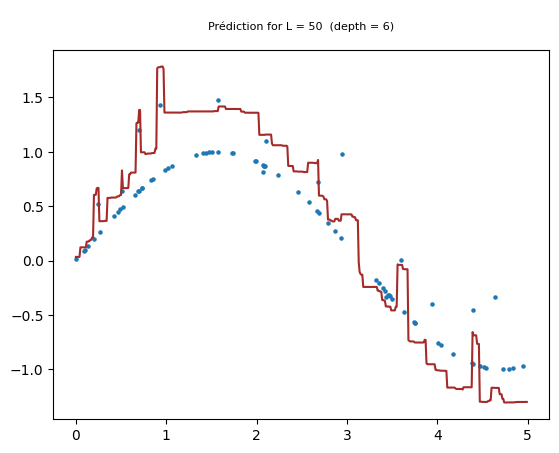

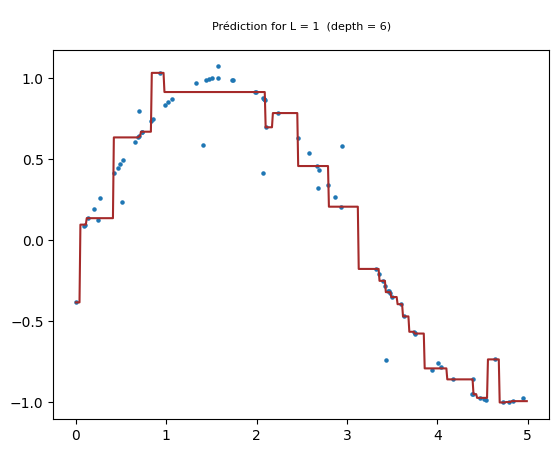

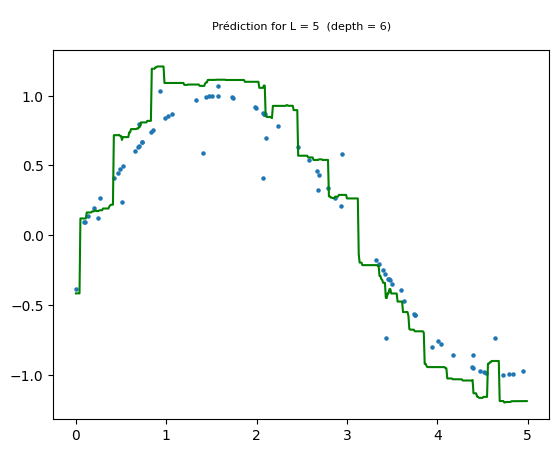

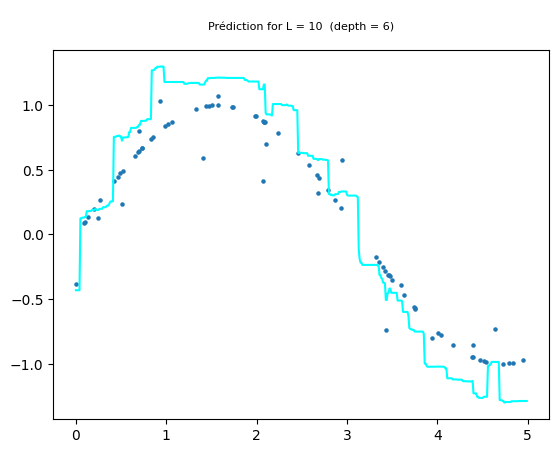

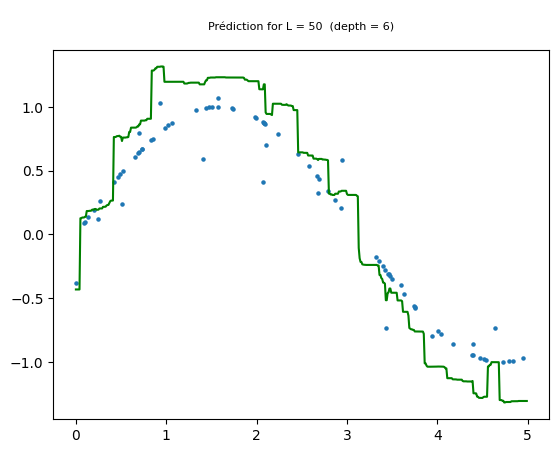

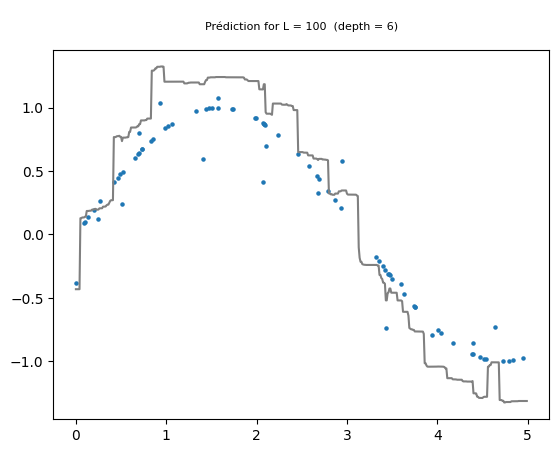

In [ ]:
depth = 6
predictions = []

for i,L in enumerate(list_L):
  w = 1/L
  regressor = DecisionTreeRegressor(max_depth= depth)
  bagging = BaggingRegressor(regressor,n_estimators=L,bootstrap=False,max_samples=0.5)

  bagging.fit(X, y)

  # Prédiction sur l'ensemble de test
  y_pred = bagging.predict(X_test)
  predictions.append(w*y_pred)

  aggregated = np.sum(predictions,axis=0)
  plt.figure(i)
  plt.scatter(X,y,s=5)
  plt.plot(X_test,aggregated,color=np.random.choice(colors))
  plt.title(f'\nPrédiction for L = {L}  (depth = {depth})\n',fontsize=8)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC
from sklearn import datasets
import pandas as pd

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
boston = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
# Charger les datasets
diabetes = datasets.load_diabetes()
iris = datasets.load_iris()
digits = datasets.load_digits()

In [ ]:
# Fonction pour évaluer un modèle avec 7-fold cross-validation
def evaluate_model(model, X, y):
    return cross_val_score(model, X, y, cv=7, scoring='accuracy' if model.__class__ == RandomForestClassifier or model.__class__ == SVC else 'neg_mean_squared_error').mean()

# Datasets et modèles à tester
datasets_list = [
    (diabetes.data, diabetes.target, RandomForestRegressor(), 'Diabetes (RandomForest)'),
    (iris.data, iris.target, RandomForestClassifier(), 'Iris (RandomForest)'),
    (digits.data, digits.target, RandomForestClassifier(), 'Digits (RandomForest)')
]

svm_results = []

# Évaluation des Random Forests et SVM
for X, y, model, name in datasets_list:
    # Évaluer Random Forest
    rf_score = evaluate_model(model, X, y)
    print(f'{name} - Random Forest Score: {rf_score}')

    # Pour les datasets de classification, évaluer un SVM linéaire
    if model.__class__ == RandomForestClassifier:
        svm = SVC(kernel='linear')
        svm_score = evaluate_model(svm, X, y)
        print(f'{name} - SVM (linear) Score: {svm_score}')
        svm_results.append((name, rf_score, svm_score))

    # Pour les datasets de régression, évaluer un SVM linéaire avec SVR (Support Vector Regression)
    else:
        from sklearn.svm import SVR
        svm_regressor = SVR(kernel='linear')
        svm_score = evaluate_model(svm_regressor, X, y)
        print(f'{name} - SVM (linear) Regression Score: {-svm_score}')  # Le score est négatif pour la régression

Diabetes (RandomForest) - Random Forest Score: -3422.8024973249712
Diabetes (RandomForest) - SVM (linear) Regression Score: 5962.592224820642
Iris (RandomForest) - Random Forest Score: 0.9465058750773035
Iris (RandomForest) - SVM (linear) Score: 0.9734075448361164
Digits (RandomForest) - Random Forest Score: 0.9365598075319622
Digits (RandomForest) - SVM (linear) Score: 0.9499157518065592


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


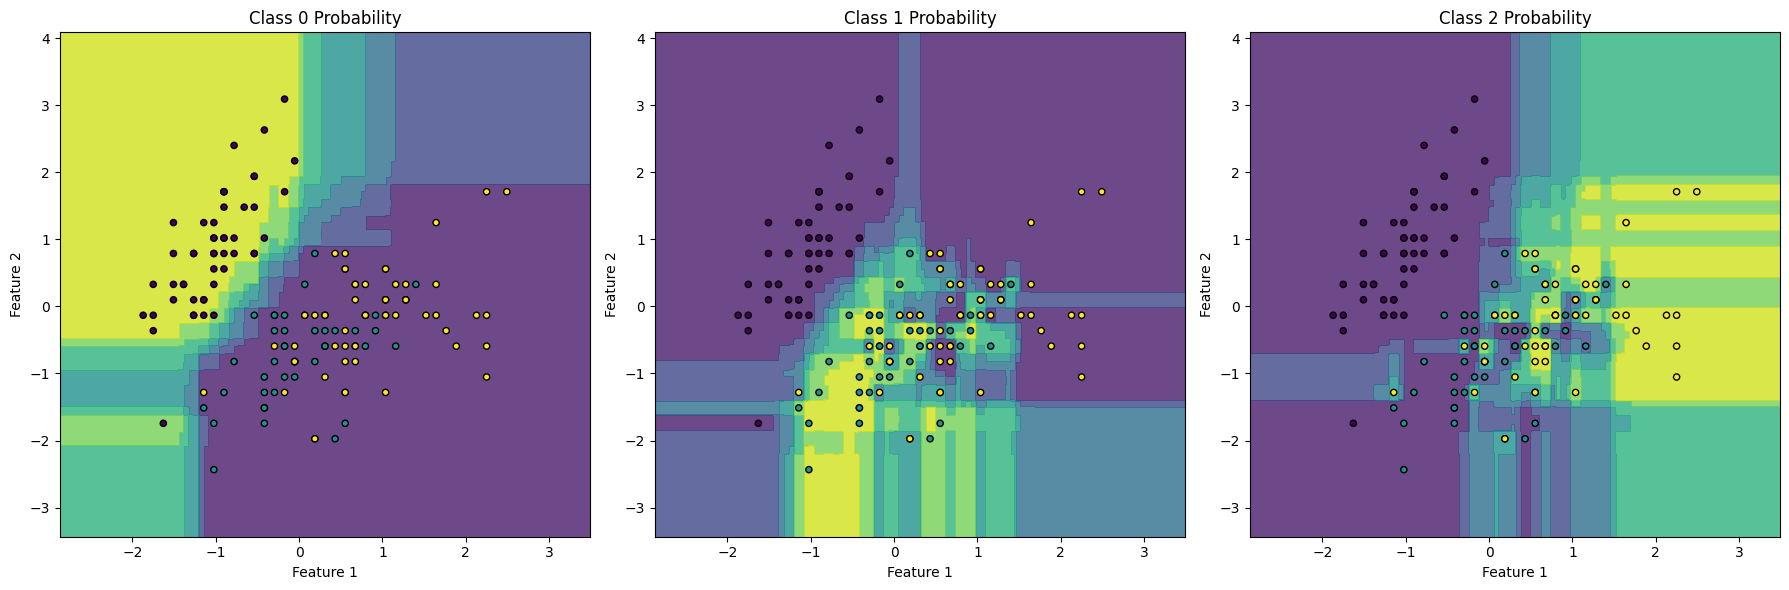

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

# Charger le dataset iris
iris = load_iris()

print(iris.feature_names)
X_unscaled, y = iris.data[:, :2], iris.target  # Prendre les 2 premières variables explicatives

# Standardiser les données
X = preprocessing.scale(X_unscaled)

# Initialiser et entraîner un RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

# Création d'un maillage de points pour visualiser les probabilités
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Prédictions des probabilités sur tout le maillage
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])

# Redimensionner la sortie pour correspondre au maillage
Z = Z.reshape(xx.shape[0], xx.shape[1], -1)

# Tracer la probabilité de chaque classe
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, ax in enumerate(axes):
    ax.contourf(xx, yy, Z[:, :, i], alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=20)
    ax.set_title(f'Class {i} Probability')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

#prendre échelle de couleurs différentes

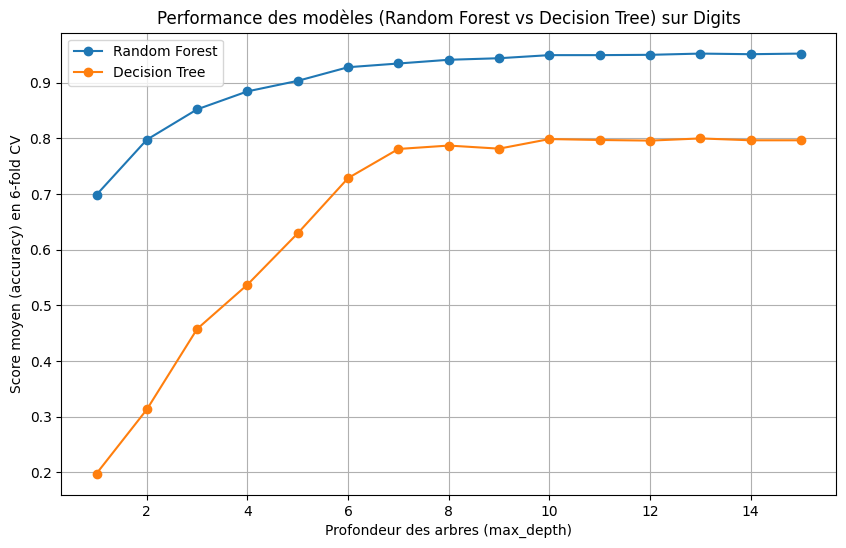

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Charger le dataset digits
digits = load_digits()
X, y = digits.data, digits.target

# Plage des profondeurs maximales à tester
max_depths = np.arange(1, 16)

# Initialiser les résultats
rf_scores = []
dt_scores = []

# Boucle pour évaluer les modèles pour chaque profondeur
for max_depth in max_depths:
    # Random Forest avec la profondeur max (l'algorithme de RandomForest ne dépend pas directement de max_depth)
    rf = RandomForestClassifier(n_estimators=100, max_depth=max_depth, random_state=42)
    rf_score = cross_val_score(rf, X, y, cv=6, scoring='accuracy').mean()
    rf_scores.append(rf_score)

    # Arbre de décision pur avec la profondeur max
    dt = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    dt_score = cross_val_score(dt, X, y, cv=6, scoring='accuracy').mean()
    dt_scores.append(dt_score)

# Tracer les résultats
plt.figure(figsize=(10, 6))
plt.plot(max_depths, rf_scores, label='Random Forest', marker='o')
plt.plot(max_depths, dt_scores, label='Decision Tree', marker='o')
plt.title("Performance des modèles (Random Forest vs Decision Tree) sur Digits")
plt.xlabel('Profondeur des arbres (max_depth)')
plt.ylabel('Score moyen (accuracy) en 6-fold CV')
plt.legend()
plt.grid(True)
plt.show()
